In [2]:
from salishsea_tools import viz_tools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import xarray as xr
import cmocean.cm as cm
import glob
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import pandas as pd
import salishsea_tools.river_202108 as rivers

In [3]:
#TODO: fix plot titles
#TODO: make so that I can do this with any river, not just the Nooksack!

In [4]:
fnames_phys = glob.glob('01mar23_31mar23/*_grid_T_*.nc') + glob.glob('01apr23_30apr23/*_grid_T_*.nc')
fnames_fw = glob.glob('01mar23_31mar23/*_rivr_T_*.nc') +glob.glob('01apr23_30apr23/*_rivr_T_*.nc')

In [5]:
phys_rivers = xr.open_mfdataset(fnames_phys)
fw_rivers = xr.open_mfdataset(fnames_fw)

In [6]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

In [7]:
## define a "global" fps for all the animations
writervideo = animation.FFMpegWriter(fps=5)

## Surface salinity and temperature

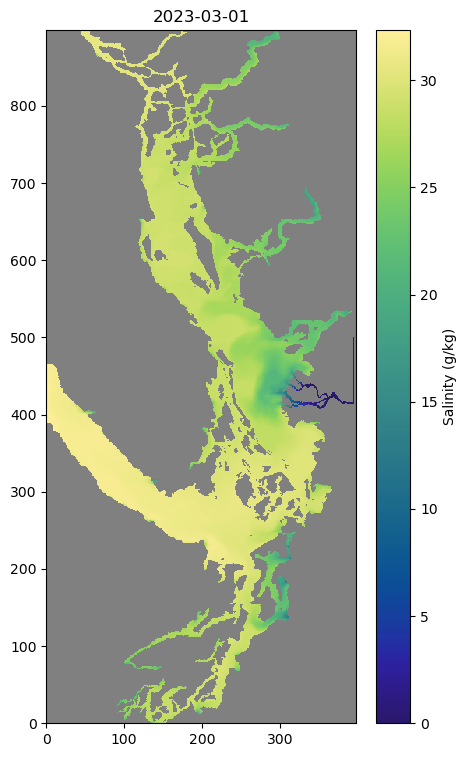

In [7]:
depth = 0 
cmap = cm.haline
cmap.set_bad('gray')

fig, ax = plt.subplots(1,1, figsize = (5, 9))
salinity = np.ma.masked_array(phys_rivers.vosaline[0, depth], mask=tmask[0])
colours = ax.pcolormesh(salinity, cmap=cmap)
cb = fig.colorbar(colours, ax=ax, label='Salinity (g/kg)')

def newframe(frame_num):
    salinity = np.ma.masked_array(phys_rivers.vosaline[frame_num, depth], mask=tmask[0])
    colours.set_array(salinity.ravel())
    dtime = pd.to_datetime(phys_rivers['time_counter'].values[frame_num])
    ax.set_title(str(dtime.date()))

ani = FuncAnimation(fig, newframe, frames=len(fnames_phys), repeat=False)
# ani.save('animations/salinity_all_domain.mp4', writer=writervideo)

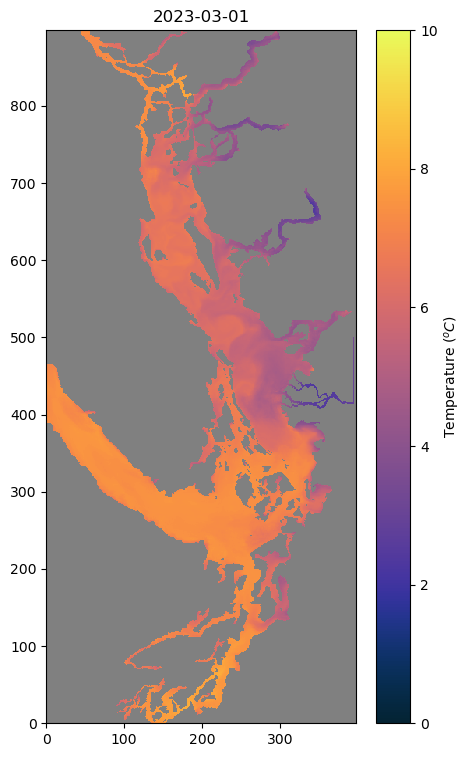

In [8]:
depth = 0 
cmap = cm.thermal
cmap.set_bad('gray')

fig, ax = plt.subplots(1,1, figsize = (5, 9))
temp = np.ma.masked_array(phys_rivers.votemper[0, depth], mask=tmask[0])
colours = ax.pcolormesh(temp, vmin=0, vmax=10, cmap=cmap)
cb = fig.colorbar(colours, ax=ax, label=r'Temperature ($^o C$)')

def newframe(frame_num):
    temp = np.ma.masked_array(phys_rivers.votemper[frame_num, depth], mask=tmask[0])
    colours.set_array(temp.ravel())
    dtime = pd.to_datetime(phys_rivers['time_counter'].values[frame_num])
    ax.set_title(str(dtime.date()))

ani = FuncAnimation(fig, newframe, frames=len(fnames_phys), repeat=False)
# ani.save('animations/temp_all_domain.mp4', writer=writervideo)

## Rivers

In [8]:
def river_box(w_shed, r_call, box_side):
    river_idx = [rivers.prop_dict[w_shed][r_call]['i'], rivers.prop_dict[w_shed][r_call]['j']]
    river_range = [river_idx[0] - box_side, river_idx[0] + box_side, river_idx[1] - box_side, river_idx[1] + box_side]

    if (river_range[0] < 0):
        river_range[0] = 0
        river_range[1] = box_side*2

    if (898 - river_range[1] < 0):
        river_range[0] = 898-box_side*2
        river_range[1] = 898

    if (398 - river_range[3] < 0):
        river_range[2] = 398-box_side*2
        river_range[3] = 398

    return river_range

In [9]:
box_size = 40
# order (CW starting under the Fraser): Nooksack, Skagit, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Salmon, Homathko, Squamish
Nooksack = river_box('fraser', 'Nooksack', box_size)
Skagit = river_box('skagit', 'Skagit1', box_size)
Snohomish = river_box('skagit', 'SnohomishAllenQuilceda', box_size)
Nisqually = river_box('puget', 'NisquallyMcAllister', box_size)
Elwha = river_box('jdf', 'Elwha', box_size)
Cowichan = river_box('evi_s', 'Cowichan1', box_size)
Nanaimo = river_box('evi_s', 'Nanaimo1', box_size)
Puntledge = river_box('evi_s', 'Puntledge', box_size)
Salmon = river_box('evi_n', 'SalmonSayward', box_size)
Homathko = river_box('bute', 'Homathko', box_size)
Squamish = river_box('howe', 'Squamish', box_size)

In [18]:
Elwha

[221, 301, 94, 174]

In [11]:
gridY = np.arange(Nooksack[0],Nooksack[1])
gridX = np.arange(Nooksack[2],Nooksack[3])

In [12]:
total_freshwater = fw_rivers.nooksack_river + fw_rivers.skagit_river + fw_rivers.snohomish_river + fw_rivers.nisqually_river + fw_rivers.elwha_river + \
    fw_rivers.cowichan_river + fw_rivers.nanaimo_river + fw_rivers.puntledge_river + fw_rivers.salmon_river + fw_rivers.homathko_river + \
    fw_rivers.squamish_river + fw_rivers.other_rivers + fw_rivers.fraser_river

# Visualizations of dye

In [13]:
fudge = .0001 # need to add very small number here because we can't do log of zero without weird effects in the masking

## View all dye in the domain

In [14]:
#TODO: re-run this after reshapr? not sure why it doesnt work now
depth = 0 
cmap = mpl.colormaps['Reds']
cmap.set_bad('gray')
X = np.arange(0,398)
Y = np.arange(0,898)

fig, ax = plt.subplots(1,1, figsize = (5, 9))
subset_rivers = fw_rivers.nooksack_river[0, depth] + fw_rivers.skagit_river[0, depth] + fw_rivers.snohomish_river[0, depth] + fw_rivers.nisqually_river[0, depth] + fw_rivers.elwha_river[0, depth] + \
    fw_rivers.cowichan_river[0, depth] + fw_rivers.nanaimo_river[0, depth] + fw_rivers.puntledge_river[0, depth] + fw_rivers.salmon_river[0, depth] + fw_rivers.homathko_river[0, depth] + \
    fw_rivers.squamish_river[0, depth]
freshwater = np.ma.masked_array(subset_rivers, mask=tmask[0])
Z = freshwater + fudge
colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
cb = fig.colorbar(colours, ax=ax, label='dye')

def newframe(frame_num):
    subset_rivers = fw_rivers.nooksack_river[frame_num, 0] + fw_rivers.skagit_river[frame_num, 0] + fw_rivers.snohomish_river[frame_num, 0] + fw_rivers.nisqually_river[frame_num, 0] + fw_rivers.elwha_river[frame_num, 0] + \
    fw_rivers.cowichan_river[frame_num, 0] + fw_rivers.nanaimo_river[frame_num, 0] + fw_rivers.puntledge_river[frame_num, 0] + fw_rivers.salmon_river[frame_num, 0] + fw_rivers.homathko_river[frame_num, 0] + \
    fw_rivers.squamish_river[frame_num, 0]

    freshwater = np.ma.masked_array(subset_rivers, mask=tmask[0])
    Z = freshwater + fudge
    colours.set_array(Z.ravel())
    dtime = pd.to_datetime(fw_rivers['time_counter'].values[frame_num])
    ax.set_title('River Subset ' + str(dtime.date()))

ani = FuncAnimation(fig, newframe, frames=len(fnames_phys), repeat=False)
ani.save('animations/dye_all_domain_river_subset.mp4', writer=writervideo)
# HTML(ani.to_jshtml())

: 

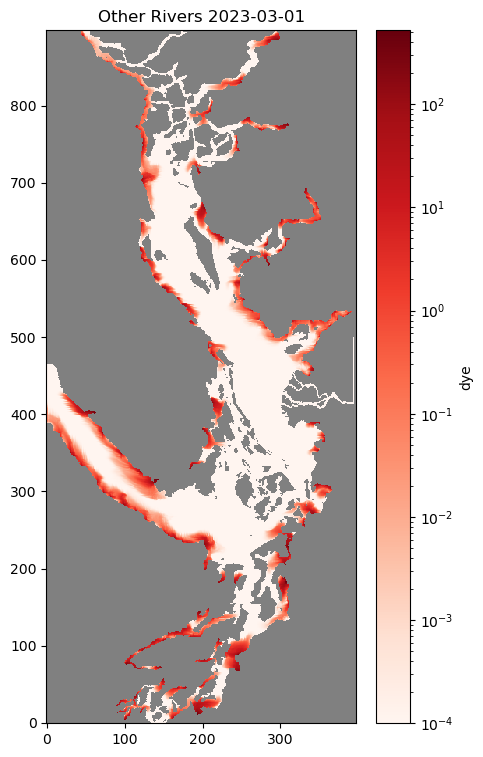

In [26]:
depth = 0 
cmap = mpl.colormaps['Reds']
cmap.set_bad('gray')
X = np.arange(0,398)
Y = np.arange(0,898)

fig, ax = plt.subplots(1,1, figsize = (5, 9))

freshwater = np.ma.masked_array(fw_rivers.other_rivers[0, depth], mask=tmask[0])
Z = freshwater + fudge
colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
cb = fig.colorbar(colours, ax=ax, label='dye')

def newframe(frame_num):
    freshwater = np.ma.masked_array(fw_rivers.other_rivers[frame_num, 0], mask=tmask[0])
    Z = freshwater + fudge
    colours.set_array(Z.ravel())
    dtime = pd.to_datetime(fw_rivers['time_counter'].values[frame_num])
    ax.set_title('Other Rivers ' + str(dtime.date()))

ani = FuncAnimation(fig, newframe, frames=len(fnames_phys), repeat=False)
ani.save('animations/dye_all_domain_other_rivers.mp4', writer=writervideo)

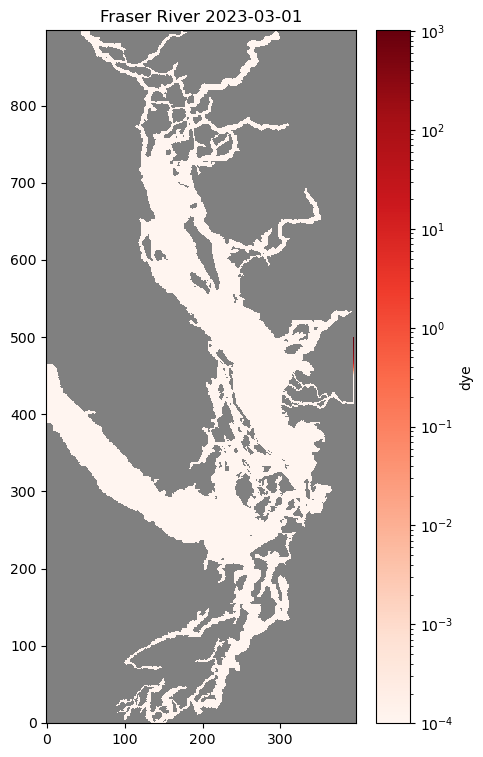

In [28]:
depth = 0 
cmap = mpl.colormaps['Reds']
cmap.set_bad('gray')
X = np.arange(0,398)
Y = np.arange(0,898)

fig, ax = plt.subplots(1,1, figsize = (5, 9))

freshwater = np.ma.masked_array(fw_rivers.fraser_river[0, depth], mask=tmask[0])
Z = freshwater + fudge
colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
cb = fig.colorbar(colours, ax=ax, label='dye')

def newframe(frame_num):
    freshwater = np.ma.masked_array(fw_rivers.fraser_river[frame_num, 0], mask=tmask[0])
    Z = freshwater + fudge
    colours.set_array(Z.ravel())
    dtime = pd.to_datetime(fw_rivers['time_counter'].values[frame_num])
    ax.set_title('Fraser River ' + str(dtime.date()))

ani = FuncAnimation(fig, newframe, frames=len(fnames_phys), repeat=False)
ani.save('animations/dye_all_domain_fraser_river.mp4', writer=writervideo)

## Surface plan views

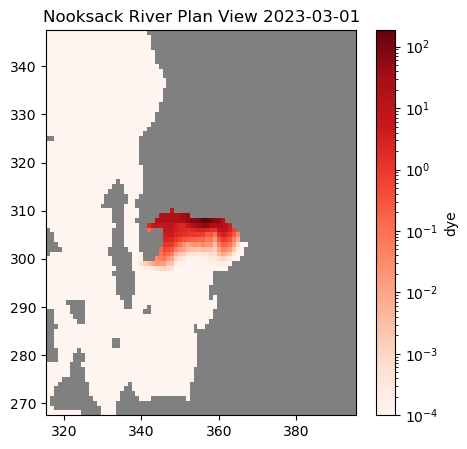

In [29]:
depth = 0 
cmap = mpl.colormaps['Reds']
cmap.set_bad('gray')

freshwater = np.ma.masked_array(fw_rivers.nooksack_river[0, depth], mask=tmask[0])

X = gridX
Y = gridY
Z = freshwater[Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]] + fudge

fig, ax = plt.subplots(1,1, figsize = (5, 5))
colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
cb = fig.colorbar(colours, ax=ax, label='dye')

def newframe(frame_num):
    freshwater = np.ma.masked_array(fw_rivers.nooksack_river[frame_num, depth], mask=tmask[0])
    Z = freshwater[Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]] + fudge

    colours.set_array(Z.ravel())
    dtime = pd.to_datetime(fw_rivers['time_counter'].values[frame_num])
    ax.set_title('Nooksack River Plan View ' + str(dtime.date()))

ani = FuncAnimation(fig, newframe, frames=len(fnames_phys), repeat=False)
ani.save('animations/Nooksack_plan_view.mp4', writer=writervideo)

## Side slice views

In [ ]:
# vertical slice along Y
depth = 0 
cmap = mpl.colormaps['Reds']
cmap.set_bad('gray')

freshwater = np.ma.masked_array(fw_rivers.nooksack_river[0, :, :, rivers.prop_dict['fraser']['Nooksack']['j']], mask=tmask[:, :, rivers.prop_dict['fraser']['Nooksack']['j']])

X = fw_rivers.nav_lat[0][Nooksack[0]:Nooksack[1], rivers.prop_dict['fraser']['Nooksack']['j']+1]
Y = fw_rivers.deptht
Z = freshwater[:, Nooksack[0]:Nooksack[1]] + fudge

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
cb = fig.colorbar(colours, ax=ax, label='dye')

def newframe(frame_num):
    freshwater = np.ma.masked_array(fw_rivers.nooksack_river[frame_num, :, :, rivers.prop_dict['fraser']['Nooksack']['j']], mask=tmask[:, :, rivers.prop_dict['fraser']['Nooksack']['j']])
    Z = freshwater[:, Nooksack[0]:Nooksack[1]] + fudge

    colours.set_array(Z.ravel())
    dtime = pd.to_datetime(fw_rivers['time_counter'].values[frame_num])
    ax.set_title('Nooksack River Vertical Tsect along Y ' + str(dtime.date()))

ax.set_ylim(0, 20)

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

ani = FuncAnimation(fig, newframe, frames=len(fnames_phys), repeat=False)
# ani.save('animations/Nooksack_alongY_view.mp4', writer=writervideo)
HTML(ani.to_jshtml())

In [ ]:
# horizontal slice along X
depth = 0 
cmap = mpl.colormaps['Reds']
cmap.set_bad('gray')

freshwater = np.ma.masked_array(fw_rivers.nooksack_river[0, :, rivers.prop_dict['fraser']['Nooksack']['i'], :], mask=tmask[:, rivers.prop_dict['fraser']['Nooksack']['i'], :])

X = fw_rivers.nav_lon[0][rivers.prop_dict['fraser']['Nooksack']['i']+1, Nooksack[2]:Nooksack[3]]
Y = fw_rivers.deptht
Z = freshwater[:, Nooksack[2]:Nooksack[3]] + fudge

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
# colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
colours = ax.pcolormesh(X, Y, Z, cmap=cmap)
cb = fig.colorbar(colours, ax=ax, label='dye')


def newframe(frame_num):
    freshwater = np.ma.masked_array(fw_rivers.nooksack_river[frame_num, :, rivers.prop_dict['fraser']['Nooksack']['i'], :], mask=tmask[:, rivers.prop_dict['fraser']['Nooksack']['i'], :])
    Z = freshwater[:, Nooksack[2]:Nooksack[3]] + fudge

    colours.set_array(Z.ravel())
    dtime = pd.to_datetime(fw_rivers['time_counter'].values[frame_num])
    ax.set_title('Nooksack River Horizontal Tsect along X ' + str(dtime.date()))

ax.set_ylim(0, 20)
# plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

ani = FuncAnimation(fig, newframe, frames=len(fnames_phys), repeat=False)
# ani.save('animations/Nooksack_alongX_view.mp4', writer=writervideo)
HTML(ani.to_jshtml())

## Combined slice views

In [13]:
Nooksack_proportion = fw_rivers.nooksack_river/total_freshwater

In [32]:
Nooksack_proportion.shape

(61, 40, 898, 398)

In [14]:
fig = plt.figure(figsize=(10,5))

grid = plt.GridSpec(2,4, wspace=0.4, hspace=0.3)
ax1 = plt.subplot(grid[0:,0:2])
ax2 = plt.subplot(grid[0,2:])
ax3 = plt.subplot(grid[1,2:])
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])

depth = 0 
cmap = mpl.colormaps['Reds']
cmap.set_bad('gray')

## finding vmax
dye_max = np.nanmax(Nooksack_proportion[:, :, Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]].values)

## axs1
freshwater1 = np.ma.masked_array(Nooksack_proportion[0, depth], mask=tmask[0])
X1 = gridX
Y1 = gridY
Z1 = freshwater1[Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]] + fudge
# colours1 = ax1.pcolormesh(X1, Y1, Z1, norm=colors.LogNorm(vmin=fudge, vmax=dye_max), cmap=cmap)
colours1 = ax1.pcolormesh(X1, Y1, Z1, vmin=fudge, vmax=dye_max, cmap=cmap)
ax1.plot([rivers.prop_dict['fraser']['Nooksack']['j'], rivers.prop_dict['fraser']['Nooksack']['j']], [Nooksack[0], Nooksack[1]-1], 'b-', alpha=0.5)
ax1.plot([Nooksack[2], Nooksack[3]-1], [rivers.prop_dict['fraser']['Nooksack']['i'], rivers.prop_dict['fraser']['Nooksack']['i']], 'g-', alpha=0.5)
cont1 = ax1.contour(X1, Y1, Z1, [0.5], colors='green')

## axs2
freshwater2 = np.ma.masked_array(Nooksack_proportion[0, :, :, rivers.prop_dict['fraser']['Nooksack']['j']], mask=tmask[:, :, rivers.prop_dict['fraser']['Nooksack']['j']])
X2 = np.arange(Nooksack[0],Nooksack[1])
Y2 = fw_rivers.deptht
Z2 = freshwater2[:, Nooksack[0]:Nooksack[1]] + fudge
# colours2 = ax2.pcolormesh(X2, Y2, Z2, norm=colors.LogNorm(vmin=fudge, vmax=dye_max), cmap=cmap)
colours2 = ax2.pcolormesh(X2, Y2, Z2, vmin=fudge, vmax=dye_max, cmap=cmap)
ax2.plot([Nooksack[0], Nooksack[1]-1],[0,0],'b-')
cont2 = ax2.contour(X2, Y2, Z2, [0.5], colors='green')
ax2.set_ylim(-1, 20)
ax2.invert_yaxis()
ax2.invert_xaxis()

## axs3
freshwater3 = np.ma.masked_array(Nooksack_proportion[0, :, rivers.prop_dict['fraser']['Nooksack']['i'], :], mask=tmask[:, rivers.prop_dict['fraser']['Nooksack']['i'], :])
X3 = np.arange(Nooksack[2],Nooksack[3])
Y3 = fw_rivers.deptht
Z3 = freshwater3[:, Nooksack[2]:Nooksack[3]] + fudge
# colours3 = ax3.pcolormesh(X3, Y3, Z3, norm=colors.LogNorm(vmin=fudge, vmax=dye_max), cmap=cmap)
colours3 = ax3.pcolormesh(X3, Y3, Z3, vmin=fudge, vmax=dye_max, cmap=cmap)
ax3.plot([Nooksack[2], Nooksack[3]-1],[0,0],'g-')
cont3 = ax3.contour(X3, Y3, Z3, [0.5], colors='green')
ax3.set_ylim(-1, 20)
ax3.invert_yaxis()

cbar = fig.colorbar(colours1, ax=[ax2, ax3])
cbar.add_lines(cont1)
# fig.colorbar(colours1, ax=ax1, location='left')

def newframe(frame_num):
    dtime = pd.to_datetime(fw_rivers['time_counter'].values[frame_num])

    ax1.clear()
    # if frame_num != 0:
    #     cont1.remove()
    freshwater1 = np.ma.masked_array(Nooksack_proportion[frame_num, depth], mask=tmask[0])
    Z1 = freshwater1[Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]] + fudge
    colours1 = ax1.pcolormesh(X1, Y1, Z1, vmin=fudge, vmax=dye_max, cmap=cmap)
    ax1.plot([rivers.prop_dict['fraser']['Nooksack']['j'], rivers.prop_dict['fraser']['Nooksack']['j']], [Nooksack[0], Nooksack[1]-1], 'b-', alpha=0.5)
    ax1.plot([Nooksack[2], Nooksack[3]-1], [rivers.prop_dict['fraser']['Nooksack']['i'], rivers.prop_dict['fraser']['Nooksack']['i']], 'g-', alpha=0.5)
    cont1 = ax1.contour(X1, Y1, Z1, [0.5], colors='green')
    colours1.set_array(Z1.ravel())
    ax1.set_title('Nooksack Plume ' + str(dtime.date()))

    ax2.clear()
    freshwater2 = np.ma.masked_array(Nooksack_proportion[frame_num, :, :, rivers.prop_dict['fraser']['Nooksack']['j']], mask=tmask[:, :, rivers.prop_dict['fraser']['Nooksack']['j']])
    Z2 = freshwater2[:, Nooksack[0]:Nooksack[1]] + fudge
    colours2 = ax2.pcolormesh(X2, Y2, Z2, vmin=fudge, vmax=dye_max, cmap=cmap)
    colours2.set_array(Z2.ravel())
    ax2.plot([Nooksack[0], Nooksack[1]-1],[0,0],'b-')
    cont2 = ax2.contour(X2, Y2, Z2, [0.5], colors='green')
    ax2.set_ylim(-1, 20)
    ax2.invert_yaxis()
    ax2.invert_xaxis()

    # freshwater2 = np.ma.masked_array(Nooksack_proportion[frame_num, :, :, rivers.prop_dict['fraser']['Nooksack']['j']], mask=tmask[:, :, rivers.prop_dict['fraser']['Nooksack']['j']])
    # Z2 = freshwater2[:, Nooksack[0]:Nooksack[1]] + fudge
    # colours2.set_array(Z2.ravel())
    # ax2.set_ylim(-1, 20)
    # ax2.invert_yaxis()
    # # ax2.invert_xaxis()

    ax3.clear()
    freshwater3 = np.ma.masked_array(Nooksack_proportion[frame_num, :, rivers.prop_dict['fraser']['Nooksack']['i'], :], mask=tmask[:, rivers.prop_dict['fraser']['Nooksack']['i'], :])
    Z3 = freshwater3[:, Nooksack[2]:Nooksack[3]] + fudge
    colours3 = ax3.pcolormesh(X3, Y3, Z3, vmin=fudge, vmax=dye_max, cmap=cmap)
    colours3.set_array(Z3.ravel())
    ax3.plot([Nooksack[2], Nooksack[3]-1],[0,0],'g-')
    cont3 = ax3.contour(X3, Y3, Z3, [0.5], colors='green')
    ax3.set_ylim(-1, 20)
    ax3.invert_yaxis()

    # freshwater3 = np.ma.masked_array(Nooksack_proportion[frame_num, :, rivers.prop_dict['fraser']['Nooksack']['i'], :], mask=tmask[:, rivers.prop_dict['fraser']['Nooksack']['i'], :])
    # Z3 = freshwater3[:, Nooksack[2]:Nooksack[3]] + fudge
    # colours3.set_array(Z3.ravel())
    # ax3.set_ylim(-1, 20)
    # ax3.invert_yaxis()

ani = FuncAnimation(fig, newframe, frames=len(fnames_phys), repeat=False)
# ani.save('animations/three_plot_slices_prop_cont.mp4', writer=writervideo)

/home/cdonaldson/conda_envs/analysis-cassidy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


: 

In [ ]:
depth = 0 
cmap = mpl.colormaps['Reds']
cmap.set_bad('gray')

freshwater = np.ma.masked_array(fw_rivers.nooksack_river[0, depth], mask=tmask[0])

X = gridX
Y = gridY
Z = freshwater[Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]] + fudge

# fig, ax = plt.subplots(1,1, figsize = (5, 5))
fig, ax = plt.subplots(2,2, figsize = (5, 5))
colours = ax[0,0].pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
cb = fig.colorbar(colours, ax=ax, label='dye')

# Sum views

In [ ]:
sum_size = 30

fig = plt.figure(figsize=(10,5))

grid = plt.GridSpec(2,4, wspace=0.4, hspace=0.3)
ax1 = plt.subplot(grid[0:,0:2])
ax2 = plt.subplot(grid[0,2:])
ax3 = plt.subplot(grid[1,2:])
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])

depth = 0 
cmap = mpl.colormaps['Reds']
cmap.set_bad('gray')

## finding vmax
# dye_max = np.nanmax(Nooksack_proportion[:, :, Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]].values)
dye_max = 600

## axs1
# freshwater1 = np.ma.masked_array(Nooksack_proportion[0, depth], mask=tmask[0])
freshwater1 = np.ma.masked_array(fw_rivers.nooksack_river[0, :], mask=tmask[:])
freshwater1 = freshwater.sum(axis=0)
X1 = gridX
Y1 = gridY
Z1 = freshwater1[Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]] + fudge
colours1 = ax1.pcolormesh(X1, Y1, Z1, vmin=fudge, vmax=dye_max, cmap=cmap)
ax1.plot([rivers.prop_dict['fraser']['Nooksack']['j'], rivers.prop_dict['fraser']['Nooksack']['j']], [Nooksack[0], Nooksack[1]-1], 'b-', alpha=0.5)
ax1.plot([Nooksack[2], Nooksack[3]-1], [rivers.prop_dict['fraser']['Nooksack']['i'], rivers.prop_dict['fraser']['Nooksack']['i']], 'g-', alpha=0.5)
cont1 = ax1.contour(X1, Y1, Z1, [0.5], colors='green')

## axs2
# freshwater2 = np.ma.masked_array(Nooksack_proportion[0, :, :, rivers.prop_dict['fraser']['Nooksack']['j']], mask=tmask[:, :, rivers.prop_dict['fraser']['Nooksack']['j']])
freshwater2 = np.ma.masked_array(fw_rivers.nooksack_river[0, :, :, :], mask=tmask[:, :, :])
X2 = np.arange(Nooksack[0],Nooksack[1])
Y2 = fw_rivers.deptht
# Z2 = freshwater2[:, Nooksack[0]:Nooksack[1]] + fudge
Z2 = np.ma.masked_array(freshwater2[:, Nooksack[0]:Nooksack[1], rivers.prop_dict['fraser']['Nooksack']['j']-sum_size:rivers.prop_dict['fraser']['Nooksack']['j']+sum_size].sum(axis=2), mask=tmask[:, Nooksack[0]:Nooksack[1], rivers.prop_dict['fraser']['Nooksack']['j']])
colours2 = ax2.pcolormesh(X2, Y2, Z2, vmin=fudge, vmax=dye_max, cmap=cmap)
ax2.plot([Nooksack[0], Nooksack[1]-1],[0,0],'b-')
cont2 = ax2.contour(X2, Y2, Z2, [0.5], colors='green')
ax2.set_ylim(-1, 20)
ax2.invert_yaxis()
ax2.invert_xaxis()

## axs3
# freshwater3 = np.ma.masked_array(Nooksack_proportion[0, :, rivers.prop_dict['fraser']['Nooksack']['i'], :], mask=tmask[:, rivers.prop_dict['fraser']['Nooksack']['i'], :])
freshwater3 = np.ma.masked_array(fw_rivers.nooksack_river[0, :, :, :], mask=tmask[:, :, :])
X3 = np.arange(Nooksack[2],Nooksack[3])
Y3 = fw_rivers.deptht
# Z3 = freshwater3[:, Nooksack[2]:Nooksack[3]] + fudge
Z3 = np.ma.masked_array(freshwater3[:, rivers.prop_dict['fraser']['Nooksack']['i']-sum_size:rivers.prop_dict['fraser']['Nooksack']['i']+sum_size, Nooksack[2]:Nooksack[3]].sum(axis=1), mask=tmask[:, rivers.prop_dict['fraser']['Nooksack']['i'], Nooksack[2]:Nooksack[3]])
colours3 = ax3.pcolormesh(X3, Y3, Z3, vmin=fudge, vmax=dye_max, cmap=cmap)
ax3.plot([Nooksack[2], Nooksack[3]-1],[0,0],'g-')
cont3 = ax3.contour(X3, Y3, Z3, [0.5], colors='green')
ax3.set_ylim(-1, 20)
ax3.invert_yaxis()

cbar = fig.colorbar(colours1, ax=[ax2, ax3])
cbar.add_lines(cont1)

def newframe(frame_num):
    dtime = pd.to_datetime(fw_rivers['time_counter'].values[frame_num])

    ax1.clear()
    # if frame_num != 0:
    #     cont1.remove()
    freshwater1 = np.ma.masked_array(fw_rivers.nooksack_river[frame_num, :], mask=tmask[:])
    freshwater1 = freshwater1.sum(axis=0)
    Z1 = freshwater1[Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]] + fudge
    colours1 = ax1.pcolormesh(X1, Y1, Z1, vmin=fudge, vmax=dye_max, cmap=cmap)
    ax1.plot([rivers.prop_dict['fraser']['Nooksack']['j'], rivers.prop_dict['fraser']['Nooksack']['j']], [Nooksack[0], Nooksack[1]-1], 'b-', alpha=0.5)
    ax1.plot([Nooksack[2], Nooksack[3]-1], [rivers.prop_dict['fraser']['Nooksack']['i'], rivers.prop_dict['fraser']['Nooksack']['i']], 'g-', alpha=0.5)
    cont1 = ax1.contour(X1, Y1, Z1, [300], colors='green')
    colours1.set_array(Z1.ravel())
    ax1.set_title('Nooksack Plume ' + str(dtime.date()))

    ax2.clear()
    freshwater2 = np.ma.masked_array(fw_rivers.nooksack_river[frame_num, :, :, :], mask=tmask[:, :, :])
    Z2 = np.ma.masked_array(freshwater2[:, Nooksack[0]:Nooksack[1], rivers.prop_dict['fraser']['Nooksack']['j']-sum_size:rivers.prop_dict['fraser']['Nooksack']['j']+sum_size].sum(axis=2), mask=tmask[:, Nooksack[0]:Nooksack[1], rivers.prop_dict['fraser']['Nooksack']['j']])
    colours2 = ax2.pcolormesh(X2, Y2, Z2, vmin=fudge, vmax=dye_max, cmap=cmap)
    colours2.set_array(Z2.ravel())
    ax2.plot([Nooksack[0], Nooksack[1]-1],[0,0],'b-')
    cont2 = ax2.contour(X2, Y2, Z2, [300], colors='green')
    ax2.set_ylim(-1, 20)
    ax2.invert_yaxis()
    ax2.invert_xaxis()

    ax3.clear()
    freshwater3 = np.ma.masked_array(fw_rivers.nooksack_river[frame_num, :, :, :], mask=tmask[:, :, :])
    Z3 = np.ma.masked_array(freshwater3[:, rivers.prop_dict['fraser']['Nooksack']['i']-sum_size:rivers.prop_dict['fraser']['Nooksack']['i']+sum_size, Nooksack[2]:Nooksack[3]].sum(axis=1), mask=tmask[:, rivers.prop_dict['fraser']['Nooksack']['i'], Nooksack[2]:Nooksack[3]])
    colours3 = ax3.pcolormesh(X3, Y3, Z3, vmin=fudge, vmax=dye_max, cmap=cmap)
    colours3.set_array(Z3.ravel())
    ax3.plot([Nooksack[2], Nooksack[3]-1],[0,0],'g-')
    cont3 = ax3.contour(X3, Y3, Z3, [300], colors='green')
    ax3.set_ylim(-1, 20)
    ax3.invert_yaxis()

ani = FuncAnimation(fig, newframe, frames=len(fnames_phys), repeat=False)
# ani.save('animations/three_plot_slices_prop_cont_sum.mp4', writer=writervideo)
HTML(ani.to_jshtml())

In [ ]:
# tstep = 0

# cmap = mpl.colormaps['Reds']
# cmap.set_bad('gray')
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# freshwater = np.ma.masked_array(fw_rivers.nooksack_river[tstep, :], mask=tmask[:])
# freshwater = freshwater.sum(axis=0)

# X = gridX
# Y = gridY
# Z = freshwater[Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]] + fudge

# colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
# cb = fig.colorbar(colours, ax=ax)
# cb.set_label('freshwater nooksack')
# ax.set_title('Plan Sum \nTimestep = {}'.format(str(tstep)))

In [ ]:
# # vertical slice sum
# sum_size = 30
# tstep = 0

# cmap = mpl.colormaps['Reds']
# cmap.set_bad('gray')
# fig, ax = plt.subplots(1, 1, figsize=(15, 5))
# freshwater = np.ma.masked_array(fw_rivers.nooksack_river[tstep, :, :, :], mask=tmask[:, :, :])

# X = fw_rivers.nav_lat[Nooksack[0]:Nooksack[1], rivers.prop_dict['fraser']['Nooksack']['j']+1]
# Y = fw_rivers.deptht
# Z = np.ma.masked_array(freshwater[:, Nooksack[0]:Nooksack[1], rivers.prop_dict['fraser']['Nooksack']['j']-sum_size:rivers.prop_dict['fraser']['Nooksack']['j']+sum_size].sum(axis=2), mask=tmask[:, Nooksack[0]:Nooksack[1], rivers.prop_dict['fraser']['Nooksack']['j']])

# colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)

# cb = fig.colorbar(colours, ax=ax)
# cb.set_label('freshwater nooksack')
# ax.set_title('Slice Sum \nTimestep = {}'.format(str(tstep)))
# ax.set_ylim(0, 20)

# plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()

In [ ]:
# # horizontal slice sum
# sum_size = 30
# tstep = 0

# cmap = mpl.colormaps['Reds']
# cmap.set_bad('gray')
# fig, ax = plt.subplots(1, 1, figsize=(15, 5))
# freshwater = np.ma.masked_array(fw_rivers.nooksack_river[tstep, :, :, :], mask=tmask[:, :, :])

# X = fw_rivers.nav_lon[rivers.prop_dict['fraser']['Nooksack']['i']+1, Nooksack[2]:Nooksack[3]]
# Y = fw_rivers.deptht
# Z = np.ma.masked_array(freshwater[:, rivers.prop_dict['fraser']['Nooksack']['i']-sum_size:rivers.prop_dict['fraser']['Nooksack']['i']+sum_size, Nooksack[2]:Nooksack[3]].sum(axis=1), mask=tmask[:, rivers.prop_dict['fraser']['Nooksack']['i'], Nooksack[2]:Nooksack[3]])

# colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)

# cb = fig.colorbar(colours, ax=ax)
# cb.set_label('freshwater nooksack')
# ax.set_title('Slice Sum \nTimestep = {}'.format(str(tstep)))
# ax.set_ylim(0, 20)

# plt.gca().invert_yaxis()

# Timeseries in region of water compisition

In [ ]:
fw_rivers.nooksack_river.shape

In [ ]:
nooksack_nooksack_ts_prop = nooksack_nooksack_ts/total_nooksack_ts

In [ ]:
plt.plot(nooksack_nooksack_ts['time_counter'], nooksack_nooksack_ts)
plt.plot(fraser_nooksack_ts['time_counter'], fraser_nooksack_ts)
plt.plot(other_nooksack_ts['time_counter'], other_nooksack_ts)

# Surface velocity (maybe bring this back later to look at where water is going, but more interested in other things right now)

In [ ]:
# zoom_fac = 13
# tstep = 0


# vel_mag = np.sqrt(vvels.vomecrty[tstep, 0]**2 + vvels.vomecrty[tstep, 0]**2)

# cmap = cm.speed
# cmap.set_bad('gray')
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# u_vels = np.ma.masked_array(uvels.vozocrtx[tstep, 0], mask=tmask[0])[Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]]
# v_vels = np.ma.masked_array(vvels.vomecrty[tstep, 0], mask=tmask[0])[Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]]
# freshwater = np.ma.masked_array(vel_mag, mask=tmask[0])

# X = gridX
# Y = gridY
# Z = freshwater[Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]] + fudge

# colours = ax.pcolormesh(X, Y, Z, vmin=0, vmax=1, cmap=cmap)
# cb = fig.colorbar(colours, ax=ax)
# cb.set_label('velocity magnitude (m/s)')

# X, Y = np.meshgrid(X, Y)

# ax.quiver(X, Y, u_vels, v_vels, scale=5)
# ax.set_title('Velocity \nTimestep = {}'.format(str(tstep)))
# ax.set_xlim(Nooksack[0]+zoom_fac, Nooksack[1]-zoom_fac)
# ax.set_ylim(Nooksack[2]+zoom_fac, Nooksack[3]-zoom_fac)

In [ ]:
#TODO: likely in another script, should i have one that has each individual water? if not, i need to show that they are far enough away that they don't really interact. when does water no longer "belong" to each river?